<a href="https://colab.research.google.com/github/camilorey/material_clases/blob/main/insercion_cliente_banco_class_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#para poder subir archivos
from google.colab import files 
import io #para poder extraer la información del archivo
#Para poder procesar los datos
import pandas as Pandas
#Para poder hacer una conexión a una base de datos 
import psycopg2 as Psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Subir el archivo de Excel a Google Colab. 

In [ ]:
#generamos el diálogo para subir el archivo de Excel con la información de los clientes
subidorDeArchivos = files.upload()
#transformamos el archivo subido a un DataFrame
#recordar poner el mismo nombre de archivo en la siguiente línea, si no, el Colab no funcionará
dataset = Pandas.read_excel(io.BytesIO(subidorDeArchivos['informacionClientes.xlsx']))
#chismoseamos el archivo para ver qué tenemos.
dataset.head()

Saving informacionClientes.xlsx to informacionClientes.xlsx


,cedula,estrato,sexo,edad,saldo
0,80424658,2,MASCULINO,33,1268611.54
1,1001731662,2,MASCULINO,11,1069947.51
2,45491993,3,FEMENINO,46,2312620.21
3,45589984,2,FEMENINO,53,955885.25
4,45582082,3,FEMENINO,61,1711703.72


Necesitamos extraer la información de las líneas del DataFrame. 

In [ ]:
insertEnCliente = "INSERT INTO cliente(cedula,estrato,sexo,edad,saldo) VALUES "
listaInserts = []
for idx,fila in dataset.iterrows():
  cc = "'"+str(fila['cedula'])+"'"
  est = str(fila['estrato'])
  sex = "'"+fila['sexo']+"'"
  ed = str(fila['edad'])
  sald = str(fila['saldo'])
  listaInserts.append(insertEnCliente+ '('+cc+','+est+','+sex+','+ed+','+sald+')')


Cómo nos quedaron los inserts

In [ ]:
listaInserts[0:5]

["INSERT INTO cliente(cedula,estrato,sexo,edad,saldo) VALUES ('80424658',2,'MASCULINO',33,1268611.54)",
 "INSERT INTO cliente(cedula,estrato,sexo,edad,saldo) VALUES ('1001731662',2,'MASCULINO',11,1069947.51)",
 "INSERT INTO cliente(cedula,estrato,sexo,edad,saldo) VALUES ('45491993',3,'FEMENINO',46,2312620.21)",
 "INSERT INTO cliente(cedula,estrato,sexo,edad,saldo) VALUES ('45589984',2,'FEMENINO',53,955885.25)",
 "INSERT INTO cliente(cedula,estrato,sexo,edad,saldo) VALUES ('45582082',3,'FEMENINO',61,1711703.72)"]

las credenciales de mi base de datos

In [ ]:
servidor_db = 'ruby.db.elephantsql.com'
nombre_db = 'nhxutetr'
usuario_db = 'nhxutetr'
password_db = 'HWxNQDHfQnjnm5c_z88I5-cyVH8L4tkB'

El bloque de instrucciones para comunicarse con la Base de DAtos en Python: un bloque de Excepción. 

In [ ]:
conexionDB = None
try: #intente hacer unas instrucciones
  #vamos a hacer una conexión con la Base de Datos
  conexionDB = Psycopg2.connect(host=servidor_db,database=nombre_db,user=usuario_db,password=password_db)
  print("Todo bien, nos pudimos conectar a la Base de Datos")
  cursorDB = conexionDB.cursor()
  numInsert = 0
  for insert in listaInserts:
    cursorDB.execute(insert)
  #cambios permanentes dentro de la base de datos  
  conexionDB.commit()
  conexionDB.close()
except (Exception,Psycopg2.DatabaseError) as Error:
    print("Ocurrió algo mal")
    print(Error)


Todo bien, nos pudimos conectar a la Base de Datos


Método genérico para hacer búsquedas en la DB.

In [ ]:
def busquedaComoDataFrame(queryBusqueda):
  conexionDB = None
  resultado = None #dataframe que contendrá el resultado de la búsqueda
  try:
    #vamos a hacer la conexión a la base de datos (Esta instrucción siempre es igual)
    conexionDB = Psycopg2.connect(host=servidor_db,database=nombre_db,user=usuario_db,password=password_db)
    #vamos a confirmar que estamos conectados a la base de datos
    print("conexión establecida con la base de datos")
    #vamos a ejecutar el comando y meterlo de una dentro del DataFrame
    resultado = Pandas.read_sql_query(queryBusqueda,conexionDB)
    print("resultado obtenido, todo bien")
    #ahora cerramos la conexión
    conexionDB.close()
  except (Exception,Psycopg2.DatabaseError) as Error:
    print("Ha ocurrido un error")
    print(Error)
  finally:
    if conexionDB is not None:
      conexionDB.close()
  #sea como sea el ingreso a la DB fue hecho, necesitamos retornar el resultado
  return resultado
      

In [ ]:
queryJovenes = """SELECT cliente.cedula,
                        cliente.edad,
                        cliente.estrato 
                  FROM cliente
                  WHERE cliente.edad <25;"""

In [ ]:
info_jovenes = busquedaComoDataFrame(queryJovenes)

conexión establecida con la base de datos
resultado obtenido, todo bien


In [ ]:
info_jovenes

,cedula,edad,estrato
0,1001731662,11,2
1,1001011280,1,4
2,1002909331,19,2
3,1002962218,20,2
4,1001418485,6,3
...,...,...,...
405,1001128146,19,2
406,1001094210,20,5
407,1002480574,20,4
408,1001957402,11,2


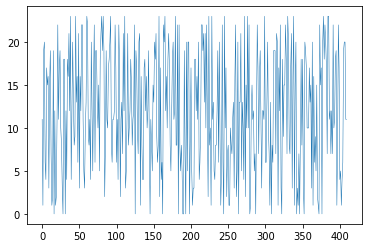

In [ ]:
info_jovenes['edad'].plot(linewidth=0.5)

In [ ]:
print("promedio de edad jóvenes", info_jovenes['edad'].mean())

promedio de edad jóvenes 11.909756097560976


In [ ]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()

In [ ]:
regresor.fit(X_train,y_train)

In [ ]:
y_prediccion = regresor.predict(X_test)